In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install azure-cognitiveservices-vision-customvision

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install azureml-core

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install azureml-mlflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install azureml-dataset-runtime

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install azureml-pipeline

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install azureml-pipeline-steps

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# 2. Data Pre-processing and Visualisation

### Importing libraries

In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils.vis_utils import plot_model
import graphviz
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from azureml.core import Workspace, Experiment
from azureml.pipeline.core import Pipeline, PipelineData
from azureml.pipeline.steps import PythonScriptStep
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\kwasi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


### Importing the dataset

In [14]:
dataset = pd.read_csv('heart_failure.csv')
dataset.head(918)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### EDA for Data Analysis

In [15]:
#data description and information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [16]:
dataset.nunique() #...calculate the number of unique values in each column

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [17]:
#perform summary statistics to gain insight about the data
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [18]:
# Initialize lists for categorical and numerical features
categorical_features = []
numerical_features = []

In [19]:
# Iterate through the columns and categorize them
for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Check if data type is object (categorical)
        categorical_features.append(column)
    else:  
        numerical_features.append(column)

In [20]:
# Print the lists
print("Categorical Features:")
print(categorical_features)
print("\nNumerical Features:")
print(numerical_features)

Categorical Features:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Numerical Features:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [21]:
X = dataset.iloc[:, :-1].values #...index selection of independent variables
y = dataset.iloc[:, -1].values  #....Index selection of the dependent variables

In [22]:
print(X)

[[40 'M' 'ATA' ... 'N' 0.0 'Up']
 [49 'F' 'NAP' ... 'N' 1.0 'Flat']
 [37 'M' 'ATA' ... 'N' 0.0 'Up']
 ...
 [57 'M' 'ASY' ... 'Y' 1.2 'Flat']
 [57 'F' 'ATA' ... 'N' 0.0 'Flat']
 [38 'M' 'NAP' ... 'N' 0.0 'Up']]


In [23]:
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

### Find missing data

In [24]:
#Check for missing values 
missing_values = dataset.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


#### Additional task to verify if there is missing value

In [25]:
#Using simple imputer to replace missing values with 'most frequent'
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(dataset)
dataset_replaced = imputer.transform(dataset)

In [26]:
print(dataset_replaced)

[[40 'M' 'ATA' ... 0.0 'Up' 0]
 [49 'F' 'NAP' ... 1.0 'Flat' 1]
 [37 'M' 'ATA' ... 0.0 'Up' 0]
 ...
 [57 'M' 'ASY' ... 1.2 'Flat' 1]
 [57 'F' 'ATA' ... 0.0 'Flat' 1]
 [38 'M' 'NAP' ... 0.0 'Up' 0]]


#### Encoding the Independent Variables with non-numerical data

In [27]:
dataset1 = dataset.copy(deep = True) #...creating an independent copy of the DataFrame
#Select the independent variables (features) with non-numerical data


In [28]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()
for feature in categorical_features:
    dataset1[feature] = le.fit_transform(dataset1[feature])

# Display the updated dataset
print(dataset1.head())



   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


### Visualisation

##### Histogram

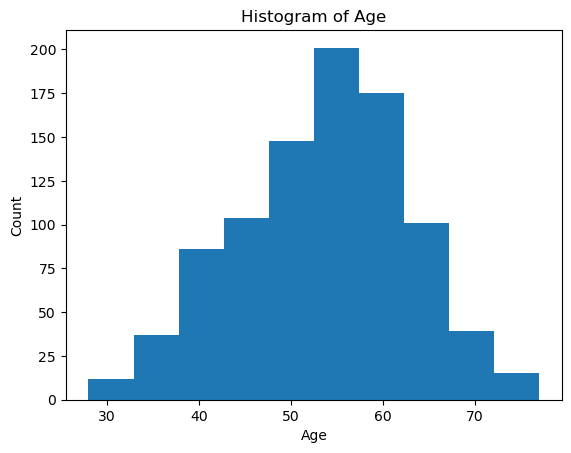

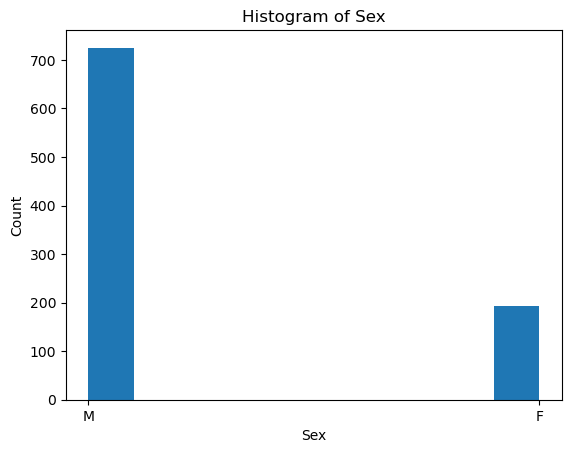

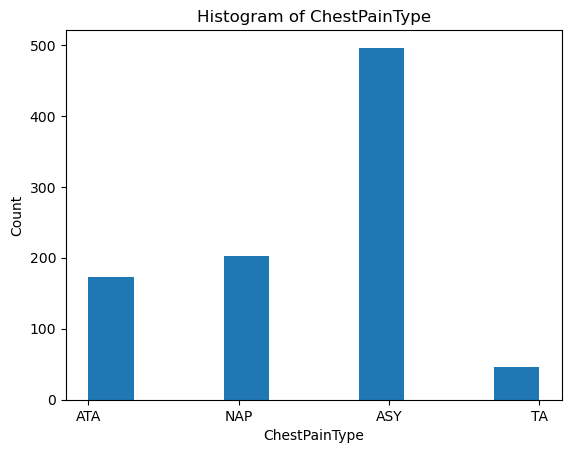

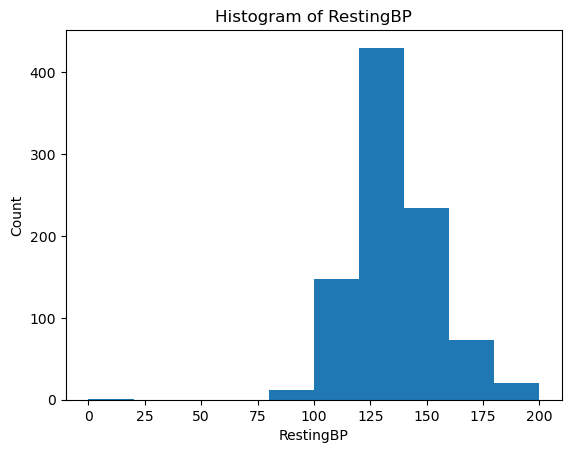

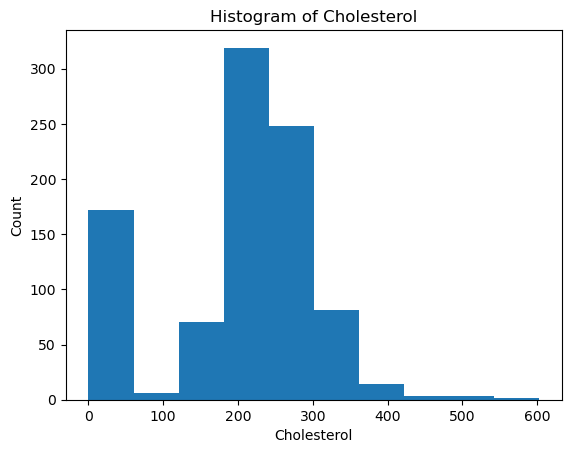

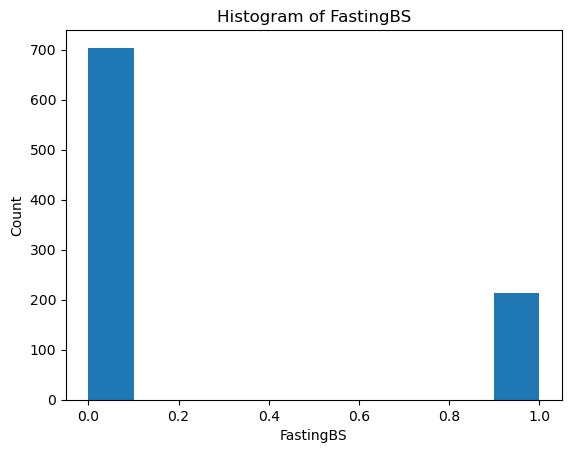

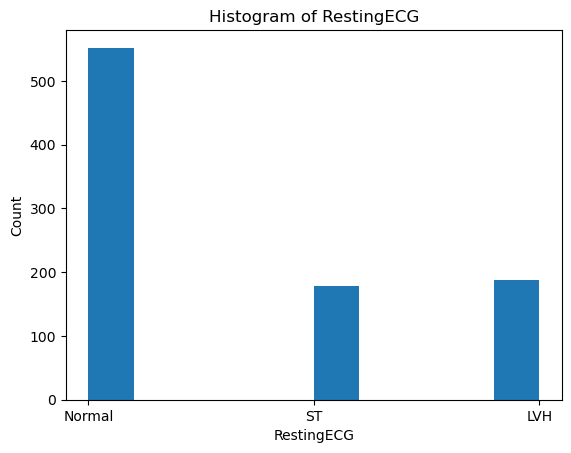

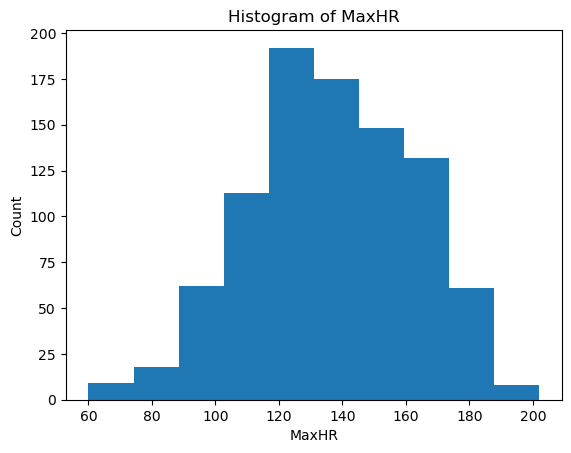

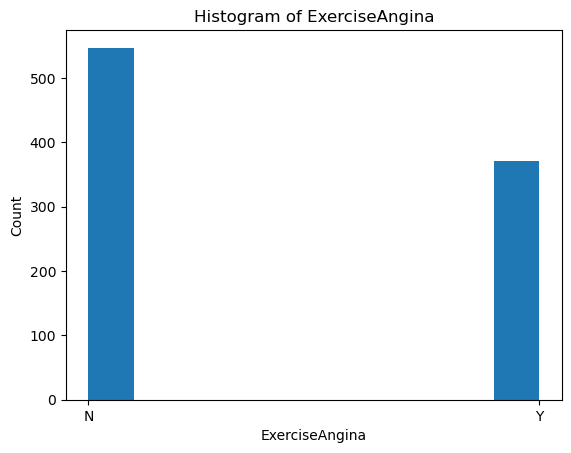

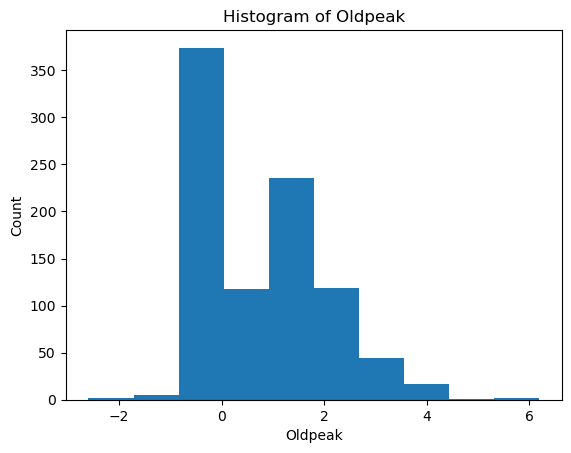

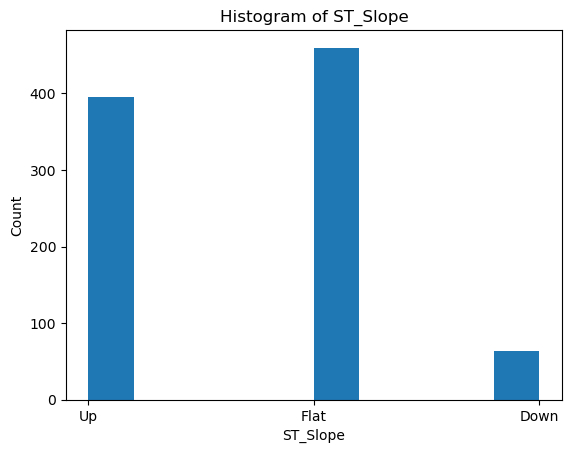

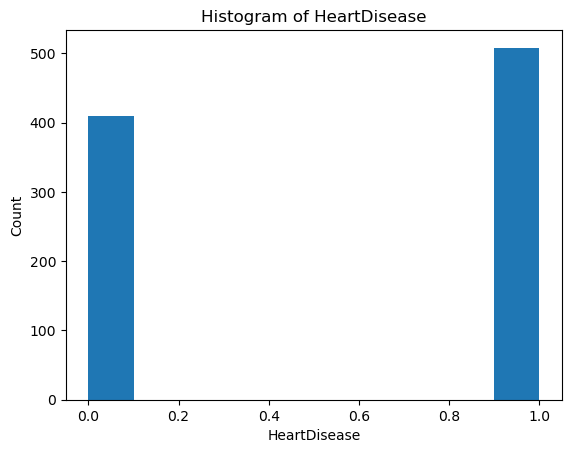

In [29]:
# Iterate through each column and create a histogram
for column in dataset.columns:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(dataset[column], bins=10)

    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Histogram of ' + column)
    
    # Display the histograms
plt.show()


##### Distribution Plot 

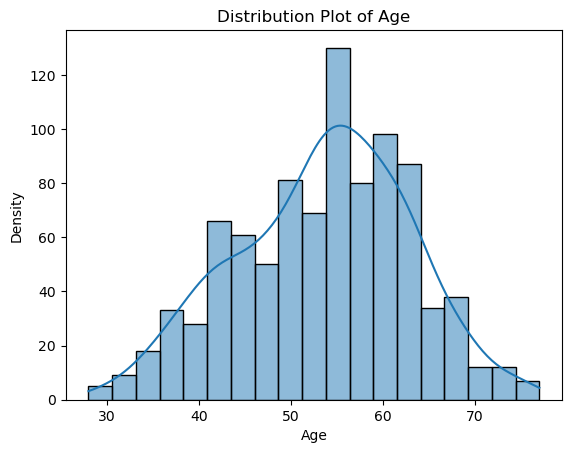

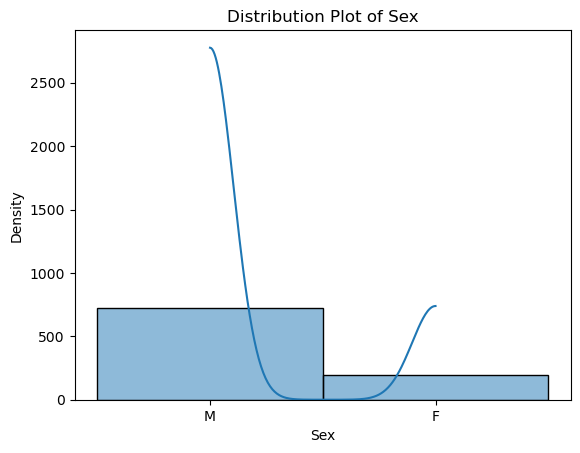

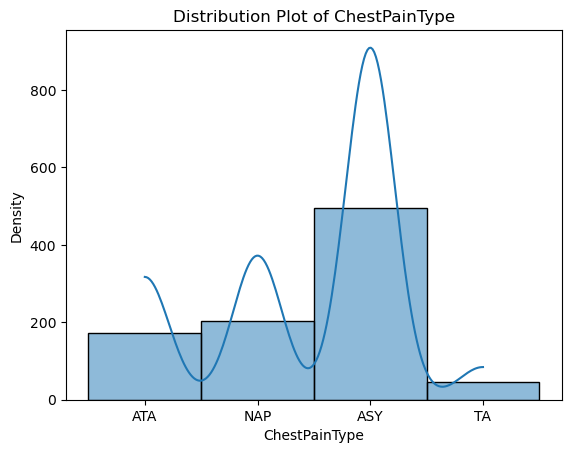

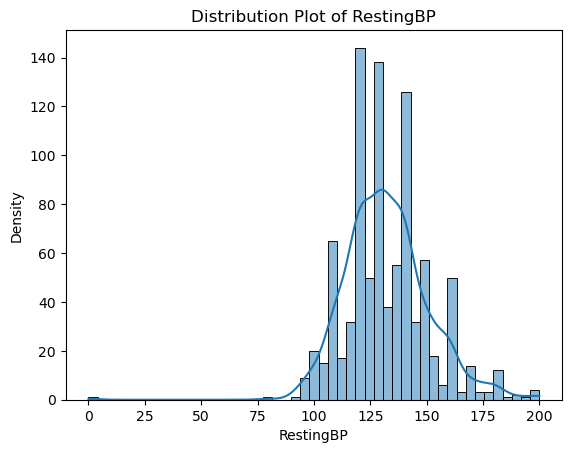

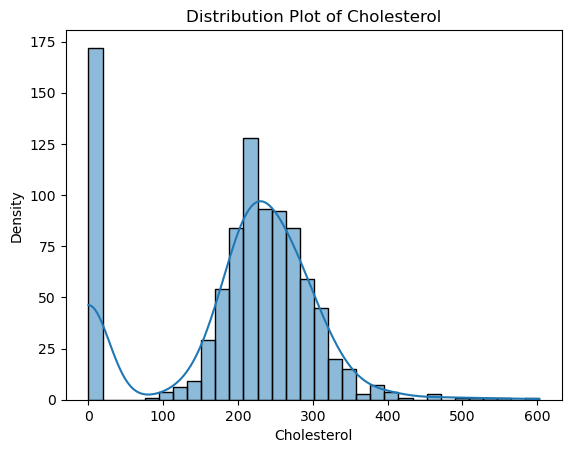

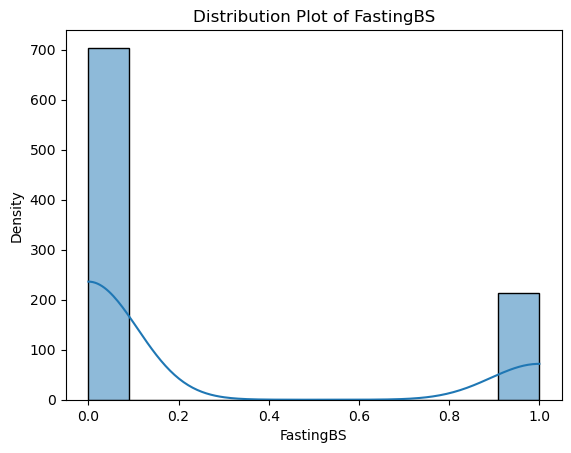

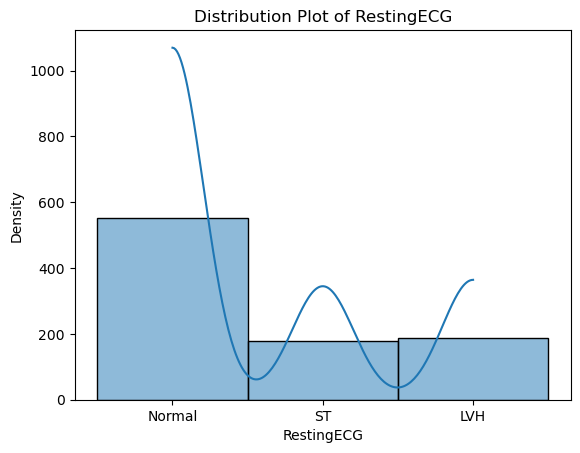

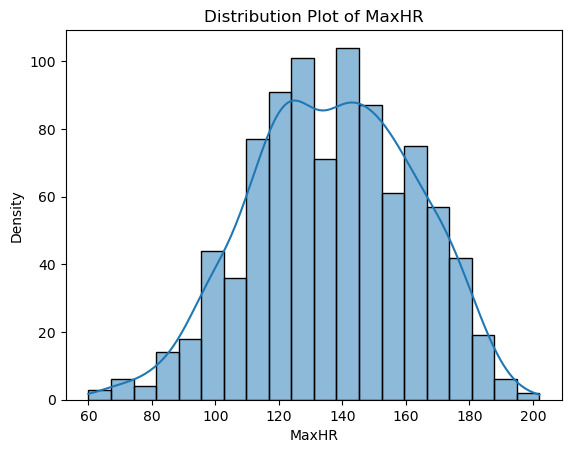

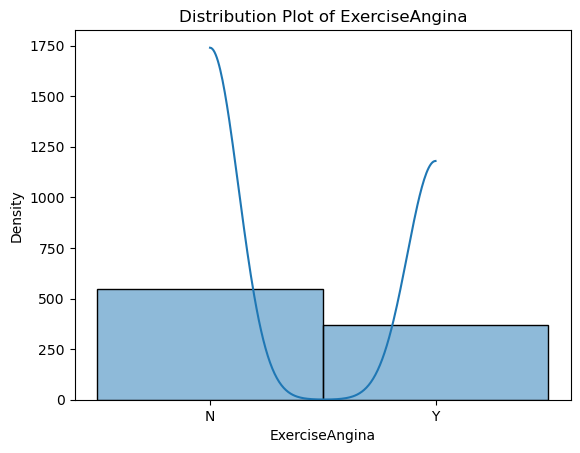

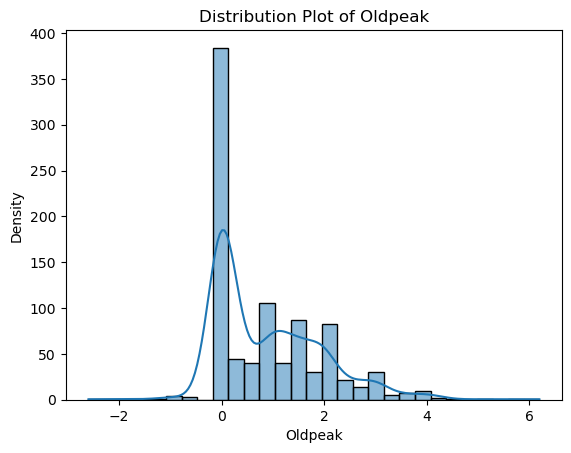

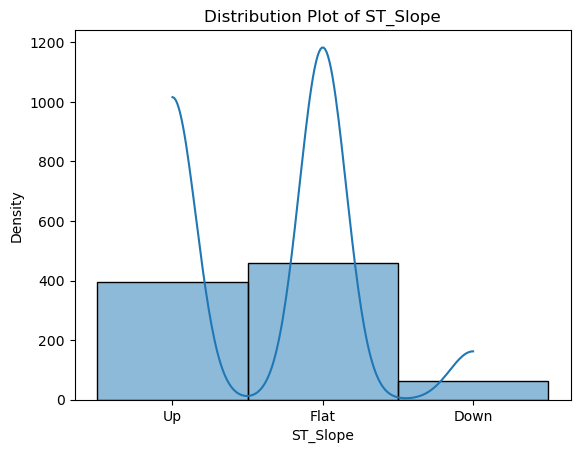

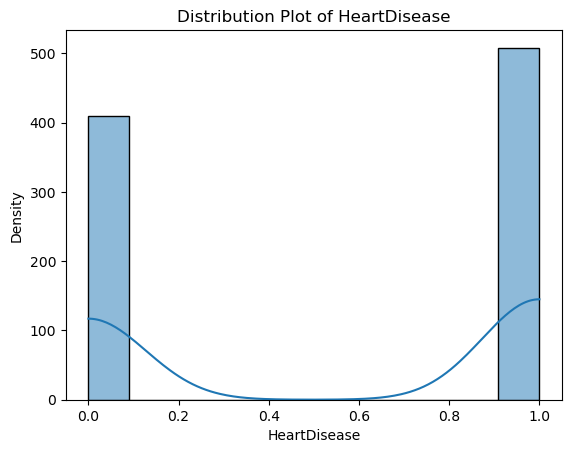

In [30]:
# Iterate through each column and create a distribution plot
for column in dataset.columns:
    plt.figure()  # Create a new figure for each distribution plot
    sns.histplot(dataset[column], kde=True)
    
# Set labels and title
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title('Distribution Plot of ' + column)
    # Display the distribution plots
plt.show()

#### Correlation Plot

In [31]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

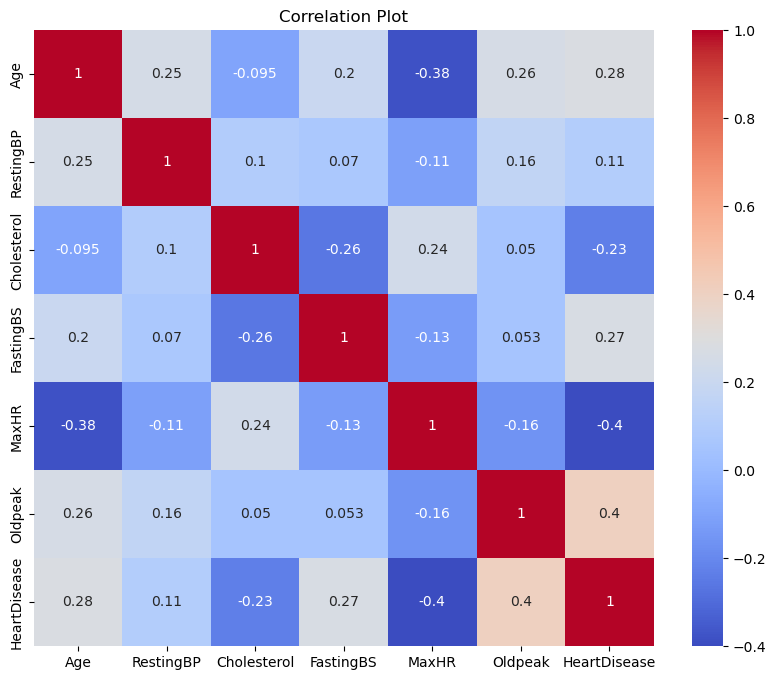

In [32]:
# Create a correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Plot")
plt.show()

### Feature Scaling

In [33]:
#...Using Normalization (min-max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset1[dataset1.columns[:-1]] = scaler.fit_transform(dataset1[dataset1.columns[:-1]])
features_scaled = dataset1[dataset1.columns[:-1]]
print(features_scaled)

          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    0.244898  1.0       0.333333       0.70     0.479270        0.0   
1    0.428571  0.0       0.666667       0.80     0.298507        0.0   
2    0.183673  1.0       0.333333       0.65     0.469320        0.0   
3    0.408163  0.0       0.000000       0.69     0.354892        0.0   
4    0.530612  1.0       0.666667       0.75     0.323383        0.0   
..        ...  ...            ...        ...          ...        ...   
913  0.346939  1.0       1.000000       0.55     0.437811        0.0   
914  0.816327  1.0       0.000000       0.72     0.320066        1.0   
915  0.591837  1.0       0.000000       0.65     0.217247        0.0   
916  0.591837  0.0       0.333333       0.65     0.391376        0.0   
917  0.204082  1.0       0.666667       0.69     0.290216        0.0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0           0.5  0.788732             0.0  0.295455       1.0  
1      

# 3. Implementation & Evaluation

## Task 1 -  Random forest classifier

### Splitting the dataset into the Training set and Test set

In [34]:
#index selection of the new dataset
X = dataset1.iloc[:, :-1].values #...index selection of independent variables
y = dataset1.iloc[:, -1].values  #....Index selection of the dependent variables

In [35]:
print(X)

[[0.24489796 1.         0.33333333 ... 0.         0.29545455 1.        ]
 [0.42857143 0.         0.66666667 ... 0.         0.40909091 0.5       ]
 [0.18367347 1.         0.33333333 ... 0.         0.29545455 1.        ]
 ...
 [0.59183673 1.         0.         ... 1.         0.43181818 0.5       ]
 [0.59183673 0.         0.33333333 ... 0.         0.29545455 0.5       ]
 [0.20408163 1.         0.66666667 ... 0.         0.29545455 1.        ]]


In [36]:
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
print(X_train)

[[0.28571429 1.         0.66666667 ... 0.         0.38636364 0.        ]
 [0.16326531 1.         0.66666667 ... 0.         0.29545455 1.        ]
 [0.57142857 1.         0.         ... 1.         0.40909091 0.5       ]
 ...
 [0.65306122 1.         0.         ... 1.         0.45454545 1.        ]
 [0.65306122 1.         0.         ... 1.         0.29545455 1.        ]
 [0.24489796 0.         0.         ... 0.         0.52272727 0.5       ]]


In [39]:
print(X_test)

[[0.71428571 0.         0.33333333 ... 0.         0.29545455 1.        ]
 [0.51020408 1.         0.66666667 ... 0.         0.29545455 0.5       ]
 [0.75510204 1.         0.         ... 0.         0.43181818 0.5       ]
 ...
 [0.73469388 1.         0.         ... 1.         0.46590909 0.5       ]
 [0.42857143 1.         0.33333333 ... 0.         0.36363636 1.        ]
 [0.73469388 1.         0.         ... 1.         0.40909091 0.5       ]]


In [40]:
print(y_train)

[0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1
 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0
 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1
 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1
 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 1 0 0 0 1 1 1 1 0 0 0 

In [41]:
print(y_test)

[0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1]


In [42]:
# Print the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (734, 11)
X_test shape: (184, 11)
y_train shape: (734,)
y_test shape: (184,)


#### perform Random Forest Classifier with 100 decision trees

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
regressor = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
regressor.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)
print(y_pred)

[0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1]


In [45]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [46]:
# Print the evaluation scores
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 0.88
Precision: 0.90
Recall: 0.90
F1-Score: 0.90


#### perform Random Forest Classifier with 10 decision trees

In [47]:
clf = RandomForestClassifier(n_estimators=10, random_state=0)
# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [48]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [49]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [50]:
# Print the evaluation scores
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 0.88
Precision: 0.95
Recall: 0.84
F1-Score: 0.89


##### Visualise the Classifier using bar chart

In [51]:
# Get feature importances
feature_imp = clf.feature_importances_
features = X[:, :-1]


In [52]:
# Sort feature importances in descending order
indices = feature_imp.argsort()[::-1]

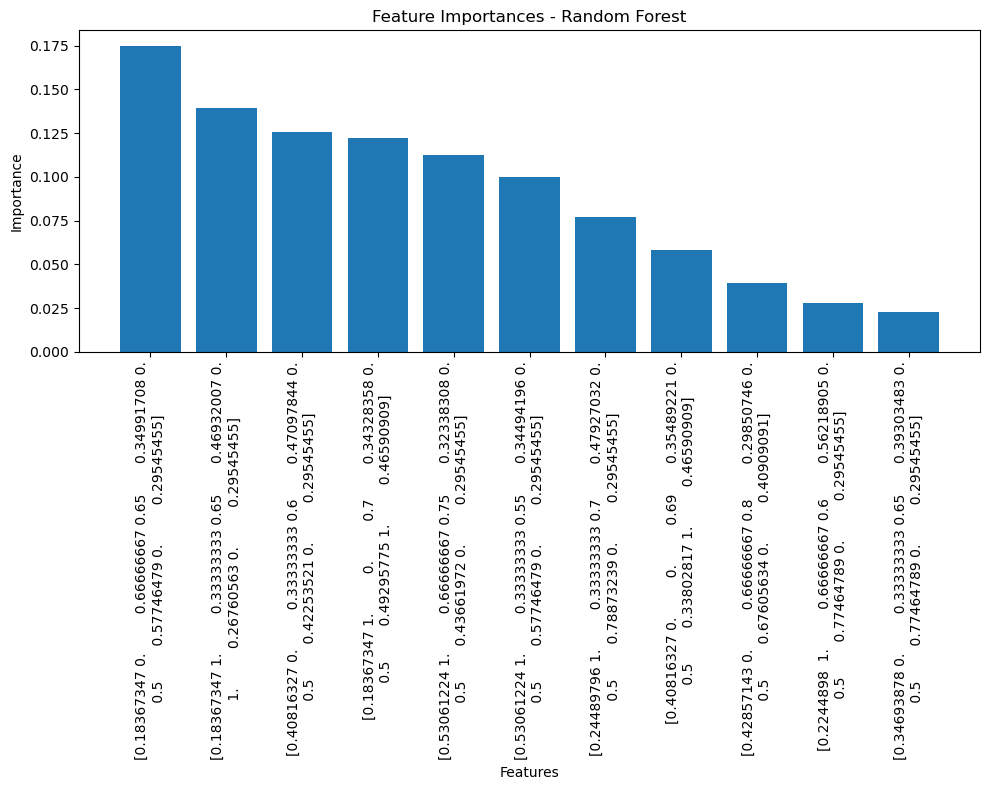

In [53]:
# Plot feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(feature_imp)), feature_imp[indices], align='center')
plt.xticks(range(len(feature_imp)), features[indices], rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

#### Perform cross-validation score

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(clf, X, y, cv=10)

In [55]:
# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.84782609 0.91304348 0.79347826 0.86956522 0.86956522 0.80434783
 0.88043478 0.80434783 0.8021978  0.74725275]
Mean Cross-Validation Score: 0.8332059245102723


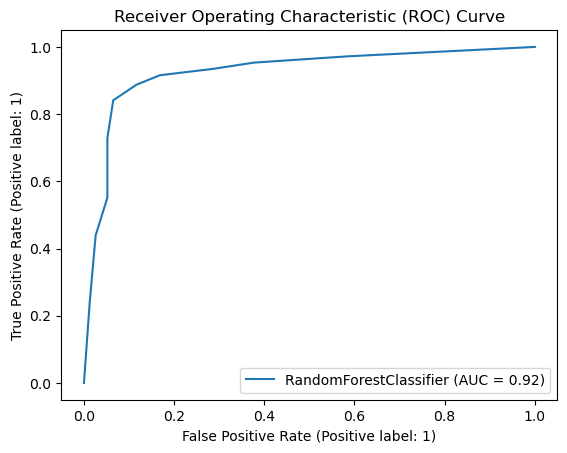

In [56]:
# Plot the ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.show()

## Task 2 - Multilayer perceptron (MLP) classifier

In [57]:
# Create an MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(20, 15, 10), activation='logistic')

In [58]:
# Fit the classifier on the training data
mlp_classifier.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 15, 10))

In [59]:
# Evaluate the classifier on the test data
accuracy = mlp_classifier.score(X_test, y_test)

# Print the evaluation scores
print("Accuracy: {:.2f}".format(accuracy))


Accuracy: 0.84


In [60]:
# Perform cross-validation on the MLP Classifier
cv_scores = cross_val_score(mlp_classifier, X, y, cv=5)

In [61]:
# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.84782609 0.91304348 0.79347826 0.86956522 0.86956522 0.80434783
 0.88043478 0.80434783 0.8021978  0.74725275]
Mean Cross-Validation Score: 0.8332059245102723


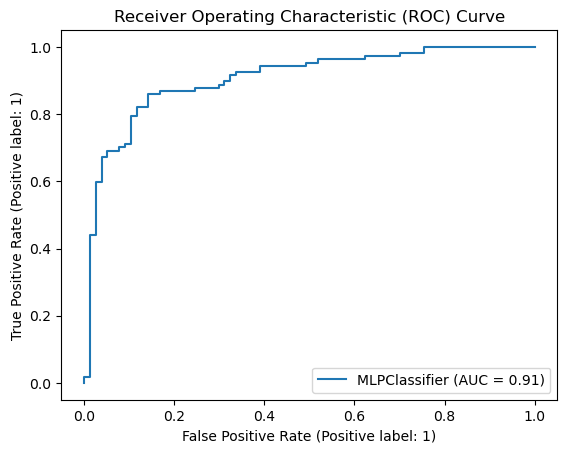

In [62]:
# Plot of ROC curve on the MLP Classifier
plot_roc_curve(mlp_classifier, X_test, y_test)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.show()

## Task 3 - Deep convolutional neural network (CNN) using the Keras or TensorFlow library

In [63]:
#Re-calling the previous feature scaling for Normalisation
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [64]:
# Shape the input features to 4D images
X = np.reshape(X, (X.shape[0], X.shape[1], 1, 1))
print(X)

[[[[0.24489796]]

  [[1.        ]]

  [[0.33333333]]

  ...

  [[0.        ]]

  [[0.29545455]]

  [[1.        ]]]


 [[[0.42857143]]

  [[0.        ]]

  [[0.66666667]]

  ...

  [[0.        ]]

  [[0.40909091]]

  [[0.5       ]]]


 [[[0.18367347]]

  [[1.        ]]

  [[0.33333333]]

  ...

  [[0.        ]]

  [[0.29545455]]

  [[1.        ]]]


 ...


 [[[0.59183673]]

  [[1.        ]]

  [[0.        ]]

  ...

  [[1.        ]]

  [[0.43181818]]

  [[0.5       ]]]


 [[[0.59183673]]

  [[0.        ]]

  [[0.33333333]]

  ...

  [[0.        ]]

  [[0.29545455]]

  [[0.5       ]]]


 [[[0.20408163]]

  [[1.        ]]

  [[0.66666667]]

  ...

  [[0.        ]]

  [[0.29545455]]

  [[1.        ]]]]


In [65]:
# Convert the target variable to categorical format
y = to_categorical(y)

In [66]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Create the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(11, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [68]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [69]:
# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 16,898
Trainable params: 16,898
Non-trainable params: 0
____________________________________________________

In [70]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)


Epoch 1/10
23/23 [==============================] - 1s 2ms/step - loss: 0.6593 - accuracy: 0.5913
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.6989
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.8025
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8093
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8161
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8188
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8256
Epoch 8/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8270
Epoch 9/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8147
Epoch 10/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8243


In [71]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.7935
Loss: 0.42208975553512573
Accuracy: 0.79347825050354


## Task4 - Using the K-means clustering algorithm

#### Demonstrate how K-means clustering corresponds to the classes in the dataset

In [72]:
# Separate features and target variable
X = dataset1.drop('HeartDisease', axis=1)
y = dataset1['HeartDisease']


In [73]:
#apply K-means clustering
k_cluster = KMeans(n_clusters=3, random_state=42)
k_cluster.fit(X)

KMeans(n_clusters=3, random_state=42)

In [74]:
#execute predicted label
y_pred = k_cluster.labels_

In [75]:
#intialize Adjusted Rand Index
ari = adjusted_rand_score(y, y_pred)
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.2033266413379964


#### Determine the optimum number of clusters using the elbow method

In [76]:
wcss = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

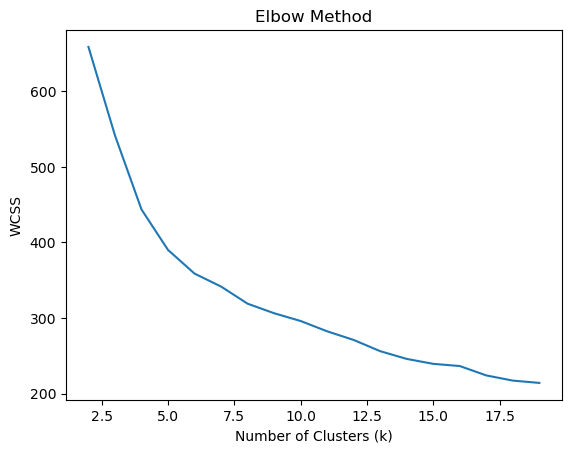

In [77]:
# Plot the within-cluster sum of squares (WCSS) against the number of clusters
plt.plot(range(2, 20), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

### Determine the optimum number of clusters 

In [78]:
# Perform clustering with  number of clusters = 2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [79]:
# Predict the cluster labels
cluster_labels = kmeans.labels_


In [80]:
# Evaluate the accuracy of the clusters
accuracy = accuracy_score(y, cluster_labels)
print("Accuracy:", accuracy)

Accuracy: 0.7309368191721133


In [81]:
# Perform clustering with  number of clusters = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [82]:
# Predict the cluster labels
cluster_labels = kmeans.labels_

In [83]:
# Evaluate the accuracy of the clusters
accuracy = accuracy_score(y, cluster_labels)
print("Accuracy:", accuracy)

Accuracy: 0.29193899782135074


### Determine the optimum number of clusters using the  Silhouette score 

In [84]:
# Separate the features from the labels
X = dataset1.drop('HeartDisease', axis=1)
y = dataset1['HeartDisease']

In [85]:
# Initialize an empty list to store the silhouette scores
silhouette_scores = []

In [86]:
# Try different values of k
for k in range(3, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

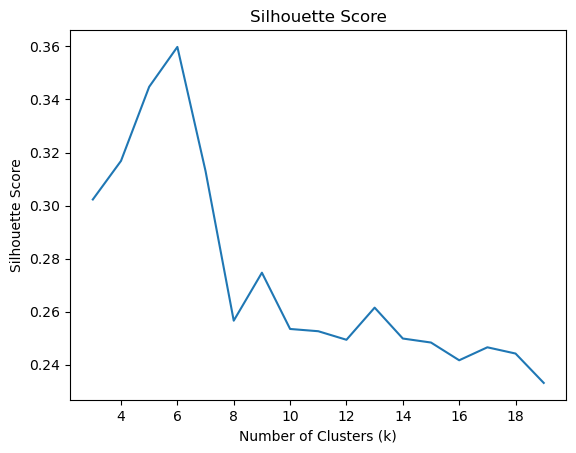

In [87]:
# Plot the silhouette scores against the number of clusters
plt.plot(range(3, 20), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [88]:
best_score = -1  # Initialize the best Silhouette score
best_n_clusters = 0

In [89]:
for n_clusters in range(3, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)

In [90]:
if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters

In [91]:
print("Best number of clusters:", best_n_clusters)
print("Silhouette score:", best_score)

Best number of clusters: 19
Silhouette score: 0.2331555121336167


# Advanced Task

## 1.  Recurrent Neural Networks (RNNs)

In [92]:
#index selection of the new dataset
X = dataset1.iloc[:, :-1].values #...index selection of independent variables
y = dataset1.iloc[:, -1].values  #....Index selection of the dependent variables

In [93]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
#...Using Normalization (min-max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [95]:
# Reshape the input features to fit the RNN input shape
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
print(X_train_reshaped)

[[[0.27083333 1.         0.66666667 ... 0.         0.38636364 0.        ]]

 [[0.14583333 1.         0.66666667 ... 0.         0.29545455 1.        ]]

 [[0.5625     1.         0.         ... 1.         0.40909091 0.5       ]]

 ...

 [[0.64583333 1.         0.         ... 1.         0.45454545 1.        ]]

 [[0.64583333 1.         0.         ... 1.         0.29545455 1.        ]]

 [[0.22916667 0.         0.         ... 0.         0.52272727 0.5       ]]]


In [96]:
# Define the RNN model
model = Sequential()
model.add(LSTM(units=64, input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(units=2, activation='softmax'))  # Change units to 2 for binary classification


In [97]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Change loss function

In [98]:
# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)



Epoch 1/10
23/23 [==============================] - 2s 2ms/step - loss: 0.6804 - accuracy: 0.7098
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.6553
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.8011
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.8174
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4583 - accuracy: 0.8379
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8406
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3934 - accuracy: 0.8365
Epoch 8/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.8379
Epoch 9/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8406
Epoch 10/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.8447


In [99]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8207
Loss: 0.4042181074619293
Accuracy: 0.820652186870575


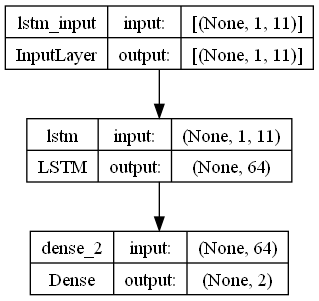

In [100]:
# Plot the model architecture
plot_model(model, to_file='rnn_model.png', show_shapes=True)


## 2. XGBoost model

In [101]:
from sklearn.model_selection import train_test_split
#index selection of the new dataset
X = dataset1.iloc[:, :-1].values #...index selection of independent variables
y = dataset1.iloc[:, -1].values  #....Index selection of the dependent variables

In [102]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
# Define the XGBoost classifier
from xgboost import XGBClassifier
classifier = XGBClassifier()


In [104]:
# Training XGBoost on the Training set
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Making the Confusion Matrix

In [105]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cm)
accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix: [[67 10]
 [17 90]]
Accuracy: 0.820652186870575


#### Applying k-Fold Cross Validation

In [106]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 85.97 %
Standard Deviation: 2.22 %


#### Plot the Cross Validation scores

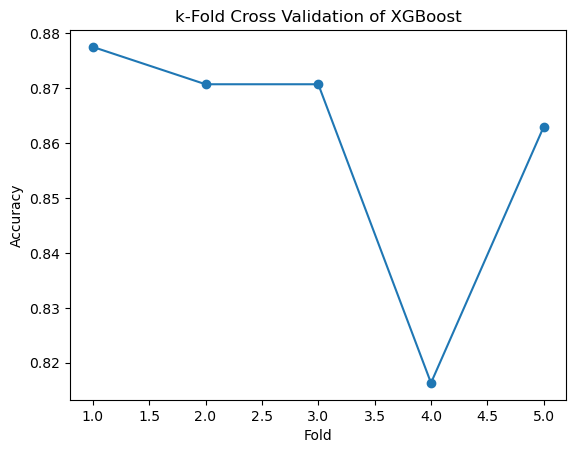

In [107]:
plt.plot(range(1, 6), accuracies, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('k-Fold Cross Validation of XGBoost')
plt.show()

## 3. k-Fold Cross Validation model

In [108]:
from sklearn.model_selection import train_test_split
#index selection of the new dataset
X = dataset[['Age', 'Cholesterol']] #...index selection of independent variables
y = dataset.iloc[:, -1].values  #....Index selection of the dependent variables

In [109]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature Scaling

In [110]:
#...Using Normalization (min-max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset1[dataset1.columns[:-1]] = scaler.fit_transform(dataset1[dataset1.columns[:-1]])
features_scaled = dataset1[dataset1.columns[:-1]]
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Training the Kernel SVM model on the Training set

In [111]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

#### Making the Confusion Matrix

In [112]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cm)
print("Accuracy:", accuracy)

Confusion Matrix: [[45 32]
 [32 75]]
Accuracy: 0.820652186870575


### Applying k-Fold Cross Validation

In [113]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.43 %
Standard Deviation: 2.56 %


#### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


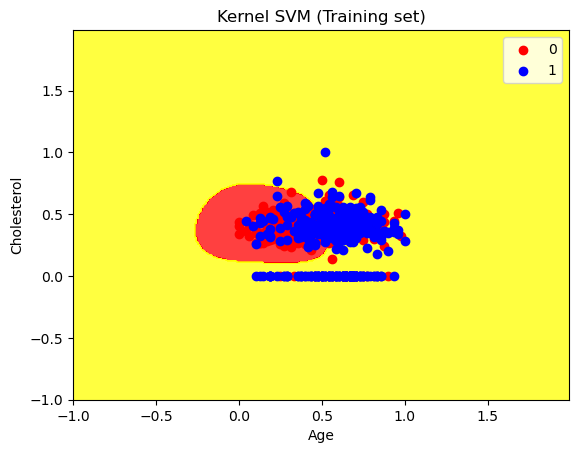

In [114]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()

# 4. Cloud-based classification service

In [115]:
#Connect to Azure ML Workspace
ws = Workspace(subscription_id='dc4e24f0-ef9c-457f-a26f-5ebdbabb86a5',
               resource_group='heart_failure',
               workspace_name='heart')

In [116]:
#Azure ML to track pipeline
experiment = Experiment(workspace=ws, name='heart-failure-prediction-experiment')


#### check the list of available compute targets in the workspace

In [117]:
from azureml.core import Workspace

# Load the workspace
ws = Workspace(subscription_id='dc4e24f0-ef9c-457f-a26f-5ebdbabb86a5',
               resource_group='heart_failure',
               workspace_name='heart')

# Print the list of available compute targets
compute_targets = ws.compute_targets
print(compute_targets.keys())

dict_keys(['aml-compute'])


#### Create Aml- Compute Target

In [118]:
from azureml.core import Workspace
from azureml.core.compute import AmlCompute, ComputeTarget

# Load the workspace
ws = Workspace(subscription_id='dc4e24f0-ef9c-457f-a26f-5ebdbabb86a5',
               resource_group='heart_failure',
               workspace_name='heart')

# Specify the configuration for the compute target
compute_config = AmlCompute.provisioning_configuration(vm_size='Standard_DS2_v2', max_nodes=4)

# Create the compute target
compute_target = ComputeTarget.create(ws, 'aml-compute', compute_config)

# Wait for the compute target to be provisioned
compute_target.wait_for_completion(show_output=True)






InProgress.
SucceededProvisioning operation finished, operation "Succeeded"
Succeeded
AmlCompute wait for completion finished

Minimum number of nodes requested have been provisioned


#### Pipeline Steps definition

In [119]:
# Define step inputs and outputs
input_data = PipelineData("input_data", datastore=None)
output_data = PipelineData("output_data", datastore=None)